In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bayesian_iv.bayesian_iv import bayesian_iv

In [2]:
df = pd.read_csv('../data/flu.csv', sep='\t')
df_female = df[df['female']==1]

df_female.head()

,treatment.assigned,treatment.received,outcome,age,copd,heart.disease,female
0,1,1,0,73,0,1,1
1,0,1,0,65,0,0,1
2,0,1,0,77,1,1,1
4,1,0,1,68,0,1,1
5,1,0,0,66,0,0,1


In [3]:
df_female.describe()

,treatment.assigned,treatment.received,outcome,age,copd,heart.disease,female
count,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.0
mean,0.525117,0.237701,0.077162,65.394096,0.204039,0.561367,1.0
std,0.499498,0.425785,0.266918,12.787362,0.403102,0.496348,0.0
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,67.000000,0.000000,1.000000,1.0
75%,1.000000,0.000000,0.000000,74.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.0


In [4]:
print(df_female[df_female['treatment.assigned']==1]['treatment.received'].mean() - df_female[df_female['treatment.assigned']==0]['treatment.received'].mean())
print(df_female[df_female['treatment.assigned']==1]['outcome'].mean() - df_female[df_female['treatment.assigned']==0]['outcome'].mean())

0.10377614165048107
-0.027500489332550407


In [5]:
N = len(df_female)

prop_scale = {
    'gamma_at': 0.002,
    'gamma_nt': 0.002,
    'beta_at': 0.003,
    'beta_nt': 0.002,
    'beta_co_c': 0.001,
    'beta_co_t': 0.001
}

model = bayesian_iv(
    Z=df_female['treatment.assigned'].values,
    W=df_female['treatment.received'].values,
    Y=df_female['outcome'].values,
    X=np.concatenate([df_female[['age', 'copd', 'heart.disease']].values, np.ones((N, 1))], axis=1),
    N_a = 30
)

In [6]:
model.sampling(
    num_samples=10000,
    thinning=10,
    prop_scale=prop_scale
)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [02:42<00:00, 61.56it/s]


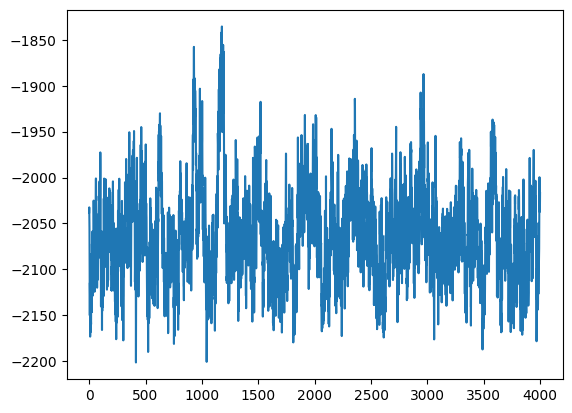

In [7]:
plt.plot(model.lp_list[6001:])

In [8]:
print(model.Z == model.W)

[ True False False ...  True False  True]


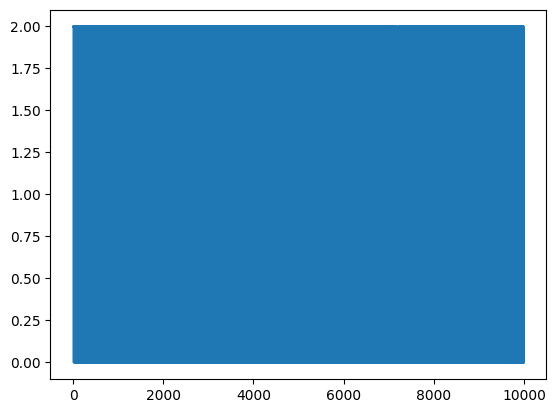

In [9]:
plt.plot(model.G_samples[:, 0])

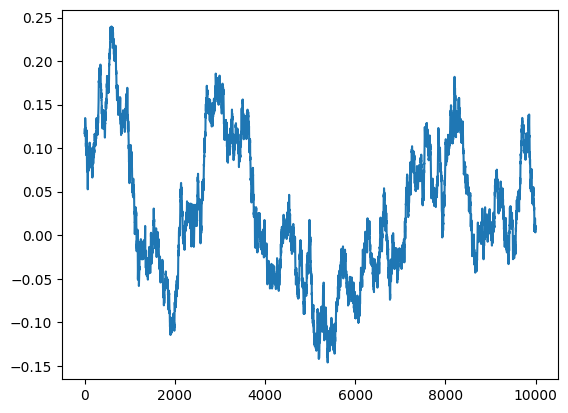

In [12]:
plt.plot(model.gamma_at_samples[:, 1])

In [11]:
print(len(np.unique(model.gamma_at_samples[2001:, 0])))
print(len(np.unique(model.gamma_nt_samples[2001:, 0])))
print(len(np.unique(model.beta_at_samples[2001:, 0])))
print(len(np.unique(model.beta_nt_samples[2001:, 0])))
print(len(np.unique(model.beta_co_c_samples[2001:, 0])))
print(len(np.unique(model.beta_co_t_samples[2001:, 0])))

7979
7947
7998
7998
7999
7999
